In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random
import numpy as np

class PrintLayer(nn.Module):
    def __init__(self):
        super(PrintLayer, self).__init__()
    
    def forward(self, x):
        # Do your print / debug stuff here
        print(x.shape)
        return x

class ConvAE_DCEC(nn.Module):
    def __init__(self, in_channels=3, embedded_dim=10):
        super(ConvAE_DCEC, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=5, padding=2, stride=2), # [16, 16, 32]
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=5, padding=2, stride=2), # [8,8,64]
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=0, stride=2), # [3,3,128]
            nn.ReLU(),
            nn.Flatten(start_dim=1),
            nn.Linear(128 * 3 * 3, embedded_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(embedded_dim, 128 * 3 * 3),
            nn.ReLU(),
            nn.Unflatten(1, (128,3,3)),
            nn.ConvTranspose2d(128, 64, kernel_size=4, padding=0, stride=2), # [8,8,64]
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, padding=1, stride=2), # [16, 16, 32]
            nn.ReLU(),
            nn.ConvTranspose2d(32, in_channels, kernel_size=4, padding=1, stride=2), # [32, 32, 3]
            nn.Sigmoid() # input image scale [0,1]
        )


    def forward(self, x):
        latent = self.encoder(x)
        return self.decoder(latent)
    
def to_img(x):
    # normalize tensor to [0,1] from [-1,1] for plotting
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    return x



In [14]:
DATASET_CACHE_DIR = './data'
BATCH_SIZE = 128
#settings from paper
LR = 0.001
N_EPOCHS = 200
USE_GPU = torch.cuda.is_available()

In [15]:
transforms_val = T.Compose([
    T.ToTensor(),
    T.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]),
])
transforms_train = T.Compose([
    # T.RandomHorizontalFlip(),
    # T.RandomResizedCrop((32, 32), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    T.ToTensor(),
    T.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]),
])


train_loader = DataLoader(CIFAR10(root=DATASET_CACHE_DIR, train=True, download=True, transform=transforms_train), batch_size=BATCH_SIZE, shuffle=True, drop_last=True, num_workers=4)
test_loader = DataLoader(CIFAR10(root=DATASET_CACHE_DIR, train=False, download=True, transform=transforms_val), batch_size=BATCH_SIZE, shuffle=False, drop_last=False, num_workers=4)

batch = next(iter(train_loader))
print(torch.max(to_img(batch[0])))
print(torch.min(to_img(batch[0])))


Files already downloaded and verified
Files already downloaded and verified
tensor(1.)
tensor(0.)


torch.Size([128, 32, 16, 16])
torch.Size([128, 64, 8, 8])
torch.Size([128, 128, 3, 3])
torch.Size([128, 1152])
torch.Size([128, 128, 3, 3])
torch.Size([128, 64, 8, 8])
torch.Size([128, 32, 16, 16])
torch.Size([128, 3, 32, 32])
torch.Size([128, 32, 16, 16])
torch.Size([128, 64, 8, 8])
torch.Size([128, 128, 3, 3])
torch.Size([128, 1152])
torch.Size([128, 128, 3, 3])
torch.Size([128, 64, 8, 8])
torch.Size([128, 32, 16, 16])
torch.Size([128, 3, 32, 32])
torch.Size([128, 32, 16, 16])
torch.Size([128, 64, 8, 8])
torch.Size([128, 128, 3, 3])
torch.Size([128, 1152])
torch.Size([128, 128, 3, 3])
torch.Size([128, 64, 8, 8])
torch.Size([128, 32, 16, 16])
torch.Size([128, 3, 32, 32])
torch.Size([128, 32, 16, 16])
torch.Size([128, 64, 8, 8])
torch.Size([128, 128, 3, 3])
torch.Size([128, 1152])
torch.Size([128, 128, 3, 3])
torch.Size([128, 64, 8, 8])
torch.Size([128, 32, 16, 16])
torch.Size([128, 3, 32, 32])
torch.Size([128, 32, 16, 16])
torch.Size([128, 64, 8, 8])
torch.Size([128, 128, 3, 3])
torch

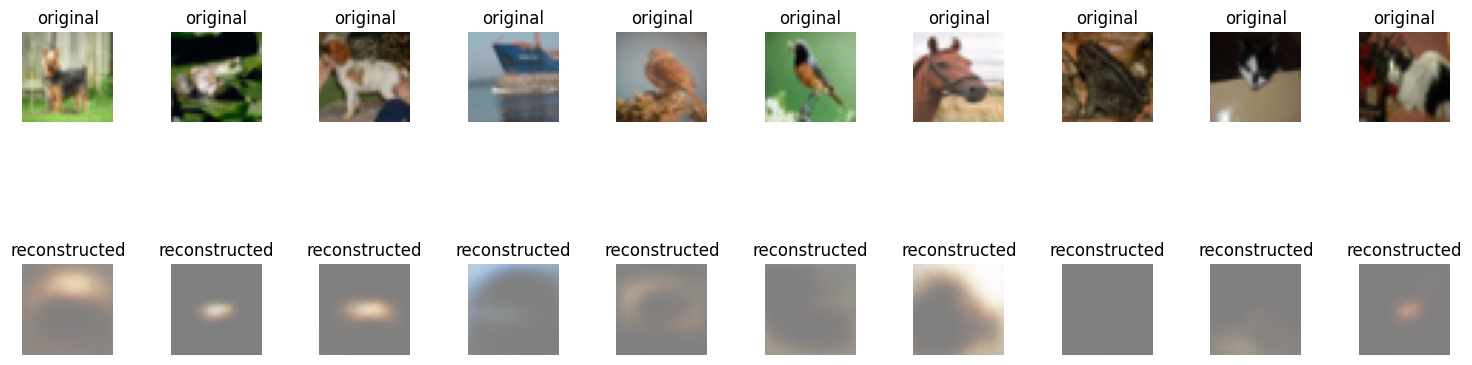

torch.Size([128, 32, 16, 16])
torch.Size([128, 64, 8, 8])
torch.Size([128, 128, 3, 3])
torch.Size([128, 1152])
torch.Size([128, 128, 3, 3])
torch.Size([128, 64, 8, 8])
torch.Size([128, 32, 16, 16])
torch.Size([128, 3, 32, 32])
torch.Size([128, 32, 16, 16])
torch.Size([128, 64, 8, 8])
torch.Size([128, 128, 3, 3])
torch.Size([128, 1152])
torch.Size([128, 128, 3, 3])
torch.Size([128, 64, 8, 8])
torch.Size([128, 32, 16, 16])
torch.Size([128, 3, 32, 32])
torch.Size([128, 32, 16, 16])
torch.Size([128, 64, 8, 8])
torch.Size([128, 128, 3, 3])
torch.Size([128, 1152])
torch.Size([128, 128, 3, 3])
torch.Size([128, 64, 8, 8])
torch.Size([128, 32, 16, 16])
torch.Size([128, 3, 32, 32])
torch.Size([128, 32, 16, 16])
torch.Size([128, 64, 8, 8])
torch.Size([128, 128, 3, 3])
torch.Size([128, 1152])
torch.Size([128, 128, 3, 3])
torch.Size([128, 64, 8, 8])
torch.Size([128, 32, 16, 16])
torch.Size([128, 3, 32, 32])
torch.Size([128, 32, 16, 16])
torch.Size([128, 64, 8, 8])
torch.Size([128, 128, 3, 3])
torch

KeyboardInterrupt: 

In [32]:
autoencoder = ConvAE_DCEC()

optimizer =  torch.optim.Adam(autoencoder.parameters(), lr=LR)

criterion =  nn.MSELoss() 

if USE_GPU:
    autoencoder.cuda()
    criterion.cuda()

for epoch in range(N_EPOCHS):
    autoencoder.train()
    losses = []
    for (X, _) in train_loader:
        if USE_GPU:
            X = X.cuda()
        
        optimizer.zero_grad()
        
    
        reconstruction = autoencoder(X)
        
        loss = criterion(X, reconstruction)
        
        loss.backward()

        losses = np.append(losses, loss.item())

        optimizer.step()

    autoencoder.eval()

    # print loss of train set
    print('Training loss: {}'.format(np.mean(losses)))

    # evaluation on test set 
    if ((epoch+1) % 10) == 0 or epoch == 0:
        X_test, _ = next(iter(test_loader))
        if USE_GPU:
            X_test = X_test.cuda()

        with torch.no_grad():
            reconstruction_test = autoencoder(X_test)

        loss = criterion(X_test, reconstruction_test)
        print('Test loss: {}'.format(loss), file=open('/dev/stdout', 'w')) # print to terminal for monitoring on gpu server

        # normalize to [0,1] for plotting
        X_test = to_img(X_test)
        reconstruction_test = to_img(reconstruction_test)
    
        # show some random images as well as some fixed images to may better see the progress
        fig, ax = plt.subplots(2, 10)
        fig.set_figwidth(15)
        fig.tight_layout()
        ax = ax.flatten()
        for i, index in enumerate(random.sample(range(len(X_test)),10)):
            img = X_test[index].cpu().numpy() 
            img_rec = reconstruction_test[index].cpu().numpy()
            ax[i].imshow(img.transpose(1,2,0))
            ax[i+10].imshow(img_rec.transpose(1,2,0))
            ax[i].set_title(f'original')
            ax[i+10].set_title(f'reconstructed')
            ax[i].set_axis_off()
            ax[i+10].set_axis_off()
        plt.show()

torch.save(autoencoder.state_dict(), "./convAE_DCED.pth")